In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = "C:\\datasets\\spe\\emission_archive.csv"
df = pd.read_csv(path)
df.dropna(inplace=True)
df

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06
6,1958,7,1958.5370,315.86,315.17,315.87,315.21
7,1958,8,1958.6219,314.93,316.17,314.01,315.29
...,...,...,...,...,...,...,...
704,2016,9,2016.7077,401.01,404.52,401.33,404.85
705,2016,10,2016.7896,401.50,405.12,401.48,405.09
706,2016,11,2016.8743,403.64,405.92,403.08,405.34
707,2016,12,2016.9563,404.55,405.49,404.66,405.58


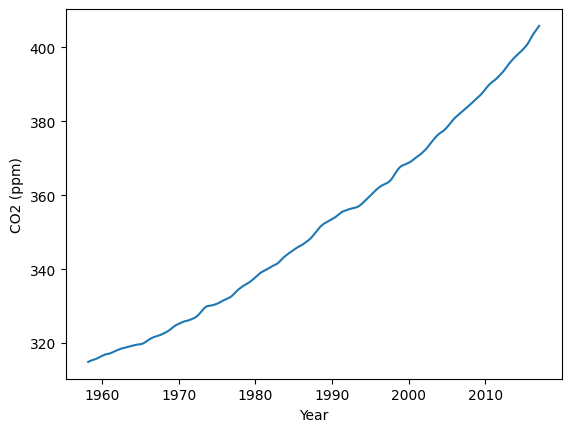

In [6]:
plt.plot(df['Decimal Date'], df['Seasonally Adjusted CO2 Fit (ppm)'])
plt.xlabel('Year')
plt.ylabel('CO2 (ppm)')
plt.show()

In [20]:
# create an LSTM model to predict the CO2 levels after 2017
from sklearn.preprocessing import MinMaxScaler
from lstm_model import model_creation
# prepare the data
X = df['Decimal Date'].values
y = df['Seasonally Adjusted CO2 Fit (ppm)'].values
print(X)
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# split the data
X_train = X[:int(len(X)*0.9)]
X_test = X[int(len(X)*0.9):]
y_train = y[:int(len(y)*0.9)]
y_test = y[int(len(y)*0.9):]

[1958.2027 1958.2877 1958.3699 1958.537  1958.6219 1958.7068 1958.874
 1958.9562 1959.0411 1959.126  1959.2027 1959.2877 1959.3699 1959.4548
 1959.537  1959.6219 1959.7068 1959.789  1959.874  1959.9562 1960.041
 1960.1257 1960.2049 1960.2896 1960.3716 1960.4563 1960.5383 1960.623
 1960.7077 1960.7896 1960.8743 1960.9563 1961.0411 1961.126  1961.2027
 1961.2877 1961.3699 1961.4548 1961.537  1961.6219 1961.7068 1961.789
 1961.874  1961.9562 1962.0411 1962.126  1962.2027 1962.2877 1962.3699
 1962.4548 1962.537  1962.6219 1962.7068 1962.789  1962.874  1962.9562
 1963.0411 1963.126  1963.2027 1963.2877 1963.3699 1963.4548 1963.537
 1963.6219 1963.7068 1963.789  1963.874  1963.9562 1964.041  1964.3716
 1964.4563 1964.5383 1964.623  1964.7077 1964.7896 1964.8743 1964.9563
 1965.0411 1965.126  1965.2027 1965.2877 1965.3699 1965.4548 1965.537
 1965.6219 1965.7068 1965.789  1965.874  1965.9562 1966.0411 1966.126
 1966.2027 1966.2877 1966.3699 1966.4548 1966.537  1966.6219 1966.7068
 1966.789  19

In [21]:
# create the LSTM model
model = model_creation()

# train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

Epoch 1/100


c:\Users\sinaz\.conda\envs\test\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1850
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1597 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1075 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0568 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0456 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0379 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0311 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0269 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0177 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0151 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0105 
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0098 
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0084 
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0097 
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0080 
Ep

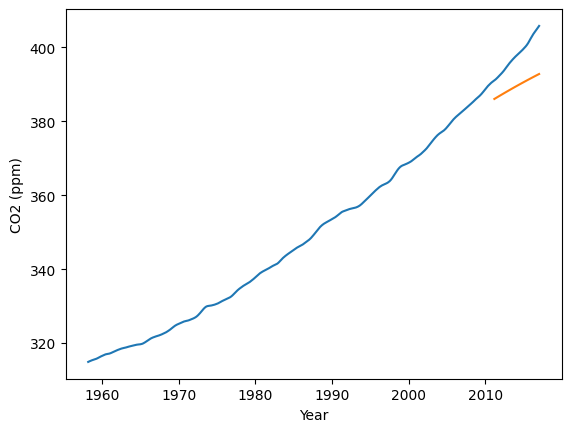

In [15]:
# plot the predictions
plt.plot(df['Decimal Date'], df['Seasonally Adjusted CO2 Fit (ppm)'])
plt.plot(df['Decimal Date'][int(len(df)*0.9):], predictions)
plt.xlabel('Year')
plt.ylabel('CO2 (ppm)')
plt.show()

In [16]:
X_future = np.arange(2020, 2030).reshape(-1, 1)
print(X_future)

[[2020]
 [2021]
 [2022]
 [2023]
 [2024]
 [2025]
 [2026]
 [2027]
 [2028]
 [2029]]


In [17]:
X_future = scaler.transform(X_future)
X_future = X_future.reshape(-1, 1, 1)
print(X_future)

[[[18.74983506]]

 [[18.76083132]]

 [[18.77182758]]

 [[18.78282384]]

 [[18.7938201 ]]

 [[18.80481636]]

 [[18.81581262]]

 [[18.82680888]]

 [[18.83780515]]

 [[18.84880141]]]


In [11]:
# I want to predict the CO2 levels for the next 10 years by using the above model
X_future = np.arange(2020, 2030).reshape(-1, 1)
print(X_future)
X_future = scaler.transform(X_future)
X_future = X_future.reshape(-1, 1, 1)
print(X_future)
future_predictions = model.predict(X_future)
future_predictions = scaler.inverse_transform(future_predictions)
future_predictions

# plot the predictions
plt.plot(df['Decimal Date'], df['Seasonally Adjusted CO2 Fit (ppm)'])
plt.plot(np.arange(2020, 2030), future_predictions)
plt.xlabel('Year')
plt.ylabel('CO2 (ppm)')
plt.show()

[[2020]
 [2021]
 [2022]
 [2023]
 [2024]
 [2025]
 [2026]
 [2027]
 [2028]
 [2029]]
[[[18.74983506]]

 [[18.76083132]]

 [[18.77182758]]

 [[18.78282384]]

 [[18.7938201 ]]

 [[18.80481636]]

 [[18.81581262]]

 [[18.82680888]]

 [[18.83780515]]

 [[18.84880141]]]


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None